# Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load bitcoin price data

df = pd.read_csv('bitcoin_price2025.csv')
df.head()

,Date,Price,Open,High,Low,Volume,Change %
0,2025-01-20,103902.6,101313.3,109228.6,99676.0,222380,2.55%
1,2025-01-19,101319.5,104536.8,106338.2,99742.7,123720,-3.08%
2,2025-01-18,104536.9,104084.7,104953.1,102297.0,79300,0.43%
3,2025-01-17,104084.9,99991.9,105843.8,99956.2,127330,4.08%
4,2025-01-16,100004.5,100499.9,100812.4,97400.2,87080,-0.49%


In [3]:
# Another way to load the data and set the column 'Date' as index
df = pd.read_csv("bitcoin_price2025.csv", index_col="Date", parse_dates=True)

In [4]:
df.head()

,Price,Open,High,Low,Volume,Change %
Date,,,,,,
2025-01-20,103902.6,101313.3,109228.6,99676.0,222380,2.55%
2025-01-19,101319.5,104536.8,106338.2,99742.7,123720,-3.08%
2025-01-18,104536.9,104084.7,104953.1,102297.0,79300,0.43%
2025-01-17,104084.9,99991.9,105843.8,99956.2,127330,4.08%
2025-01-16,100004.5,100499.9,100812.4,97400.2,87080,-0.49%


In [5]:
# Select the Bitcoin Data for January 20 2025
df.loc['2025-01-20']

Price       103902.6
Open        101313.3
High        109228.6
Low          99676.0
Volume        222380
Change %       2.55%
Name: 2025-01-20 00:00:00, dtype: object

In [6]:
# Convert all numeric columns to float
df = df.apply(pd.to_numeric, errors='coerce')
df.index

DatetimeIndex(['2025-01-20', '2025-01-19', '2025-01-18', '2025-01-17',
               '2025-01-16', '2025-01-15', '2025-01-14', '2025-01-13',
               '2025-01-11', '2025-01-10',
               ...
               '2014-01-10', '2014-01-09', '2014-01-08', '2014-01-07',
               '2014-01-06', '2014-01-05', '2014-01-04', '2014-01-03',
               '2014-01-02', '2014-01-01'],
              dtype='datetime64[ns]', name='Date', length=4037, freq=None)

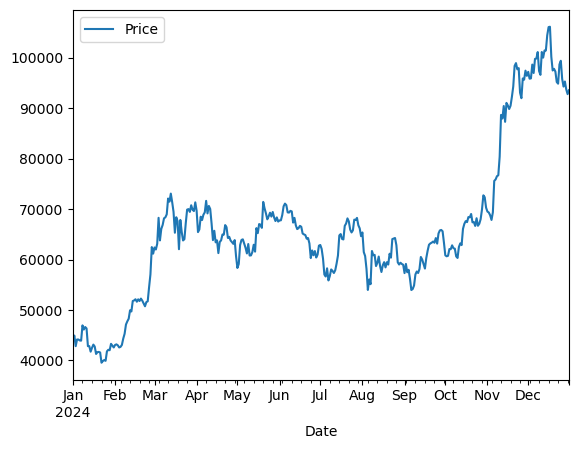

In [7]:
df[['Price']].loc['2024'].plot()
plt.show()

In [8]:
# Resampling to Weekly Frequency and calculate the mean values
df.resample('ME').mean()

,Price,Open,High,Low,Volume,Change %
Date,,,,,,
2014-01-31,935.464516,931.177419,966.835484,899.641935,9879.677419,NaN
2014-02-28,515.092857,528.125000,585.571429,476.153571,35585.000000,NaN
2014-03-31,578.867742,583.035484,599.387097,552.406452,3041.612903,NaN
2014-04-30,465.193333,465.163333,486.803333,443.793333,5371.666667,NaN
2014-05-31,485.748387,479.867742,493.580645,472.422581,2766.451613,NaN
...,...,...,...,...,...,...
2024-09-30,60357.476667,60212.016667,61275.183333,59210.553333,80238.000000,NaN
2024-10-31,65609.496774,65385.058065,66530.074194,64452.435484,83069.677419,NaN
2024-11-30,86533.500000,85664.266667,88000.880000,84422.580000,137408.333333,NaN


Resample offset aliases:
- B = business day
- D = calendar day
- W = weekly
- ME = month end
- BM = business month end
- MS = month start
- BMS = business month start
- Q = quarter end
- BQ = business quarter end
- QS = quarter start
- BQS = business quarter start
- A = year end
- BA = business year end
- AS = year start
- BAS = business year start
- h = hourly
- min = minutely
- s = secondly
- ms = milliseconds
- us = microseconds

# Exploring Data

In [9]:
df = pd.read_csv("bitcoin_price.csv", index_col="Date", parse_dates=True)
df = df.apply(pd.to_numeric, errors='coerce')

In [10]:
# Create a new column for 7- Day rolling average of the price
df['Price'].rolling(window = 7).mean()
# Plot both the rolling average and closing values

Date
2014-09-17             NaN
2014-09-18             NaN
2014-09-19             NaN
2014-09-20             NaN
2014-09-21             NaN
                  ...     
2023-12-26    43486.929687
2023-12-27    43457.016183
2023-12-28    43279.688059
2023-12-29    43008.473773
2023-12-30    42782.382254
Name: Price, Length: 3392, dtype: float64

In [11]:
df['7_day_rolling']= df['Price'].rolling(window = 7).mean()
# Plot both the rolling average and closing values
df[['Price', '7_day_rolling']]

,Price,7_day_rolling
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,NaN
2014-09-19,394.795990,NaN
2014-09-20,408.903992,NaN
2014-09-21,398.821014,NaN
...,...,...
2023-12-26,42520.402340,43486.929687
2023-12-27,43442.855470,43457.016183
2023-12-28,42627.855470,43279.688059


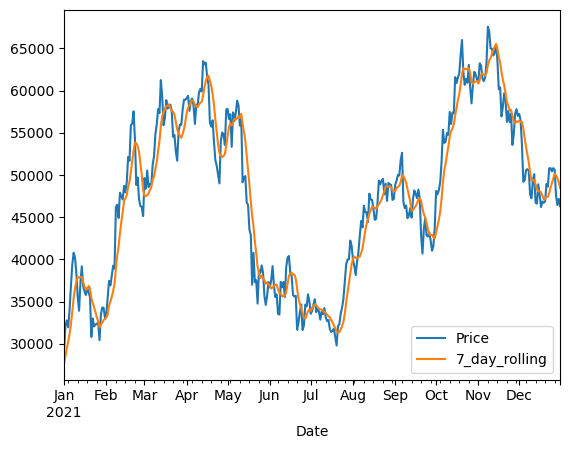

In [12]:
# Create a new column for 7- Day rolling average of the price
df['7_day_rolling']= df['Price'].rolling(window = 7).mean()
# Plot both the rolling average and closing values
df[['Price', '7_day_rolling']].loc['2021'].plot()
plt.show()

In [13]:
# Series.idxmax() - To identify the index of the maximum value in a Series.
# Find out the month with highest closing average
df.resample('ME').mean()['Price'].idxmax()

Timestamp('2021-11-30 00:00:00')

In [14]:
# Series.pct_change() - calculate the percentage change from the previous row
df['Price'].pct_change()

Date
2014-09-17         NaN
2014-09-18   -0.071926
2014-09-19   -0.069843
2014-09-20    0.035735
2014-09-21   -0.024659
                ...   
2023-12-26   -0.025055
2023-12-27    0.021694
2023-12-28   -0.018760
2023-12-29   -0.012397
2023-12-30    0.001366
Name: Price, Length: 3392, dtype: float64

In [15]:
# Create a new column for closing daily return (percentage change in the price from one day to the next)
df['daily_returns'] = df['Price'].pct_change() * 100

In [16]:
# Days with more than 10% change in closing price
df[abs(df['daily_returns']) > 10]

,Open,High,Low,Price,Adj Close,Volume,7_day_rolling,daily_returns
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,4.578320e+07,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,3.305440e+07,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,7.284390e+07,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,9.763870e+07,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,8.177350e+07,244.638280,17.821709
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140630,21439.410160,19310.962890,21381.152340,21381.152340,4.846953e+10,19781.450054,10.612188
2022-11-08,20600.671880,20664.607420,17603.544920,18541.271480,18541.271480,1.189920e+11,20409.998327,-10.006132
2022-11-09,18543.761720,18590.458980,15682.692380,15880.780270,15880.780270,1.029050e+11,19798.752093,-14.349022


# Data Visualization

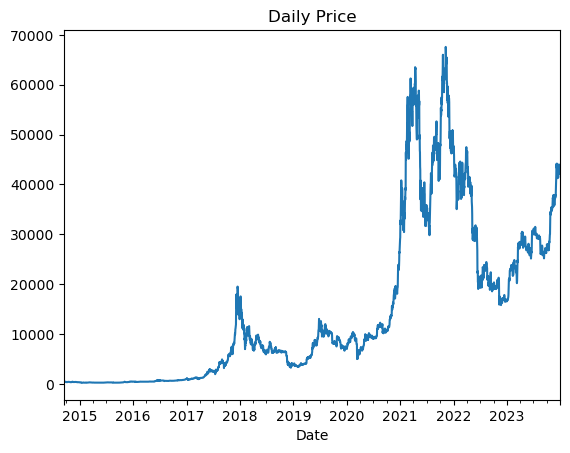

In [17]:
# Daily Closing Price Plot
df['Price'].plot(title = 'Daily Price')
plt.show()

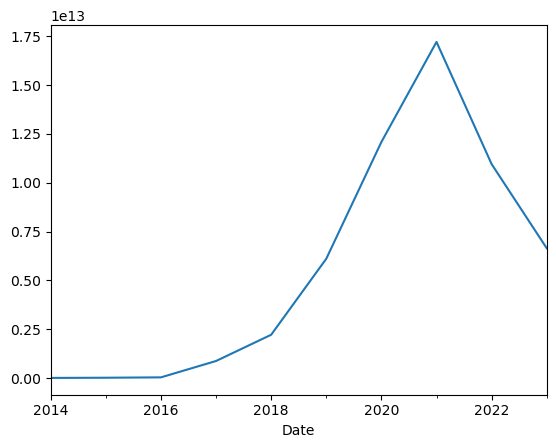

In [18]:
# Plot the Yearly Volume
df.resample('YE').sum()['Volume'].plot()
plt.show()

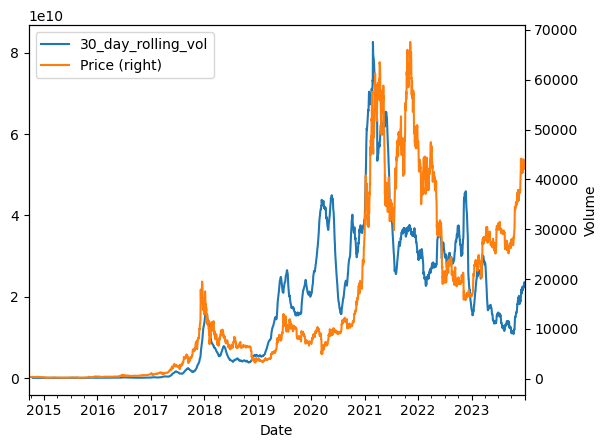

In [19]:
# Create a new column for 30- Day rolling average of the volume
df['30_day_rolling_vol'] = df['Volume'].rolling(window = 30).mean()

# Plotting Price and 30-day rolling Volume
df['30_day_rolling_vol'].plot(legend = True)
ax = df['Price'].plot(secondary_y = True, legend = True)
ax.set_ylabel('Volume')
plt.show()

In [20]:
# There's a high correlation between the 30-day rolling Volume and the Closing Price
df[['Price', '30_day_rolling_vol']].corr()

,Price,30_day_rolling_vol
Price,1.000000,0.750445
30_day_rolling_vol,0.750445,1.000000


# Data Manipulation

In [21]:
# Identify missing values
df.isnull().sum()

Open                   0
High                   0
Low                    0
Price                  0
Adj Close              0
Volume                 0
7_day_rolling          6
daily_returns          1
30_day_rolling_vol    29
dtype: int64

In [22]:
# Fill Missing values:
# value=	Replace NaNs with a specific value (number, string, dictionary).
# methods ='ffill' or 'pad' (forward fill/use previous value), 'bfill' or 'backfill' (backward fill/use next value). inplace=True modifies the DataFrame in place.

df['30_day_rolling_vol'] = df['30_day_rolling_vol'].bfill()
df.isnull().sum()

Open                  0
High                  0
Low                   0
Price                 0
Adj Close             0
Volume                0
7_day_rolling         6
daily_returns         1
30_day_rolling_vol    0
dtype: int64

In [23]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

# 5 & 6 is for Saturday and Sunday
df['is_weekend'] = df.index.weekday > 4

df.head()

,Open,High,Low,Price,Adj Close,Volume,7_day_rolling,daily_returns,30_day_rolling_vol,year,month,day,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,NaN,NaN,3.624856e+07,2014,9,17,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,NaN,-7.192558,3.624856e+07,2014,9,18,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,NaN,-6.984265,3.624856e+07,2014,9,19,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,NaN,3.573492,3.624856e+07,2014,9,20,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,NaN,-2.465854,3.624856e+07,2014,9,21,Sunday,6,True


In [24]:
## Feature Engineering - Lagged values

# Series.shift(1) - each value is moved to the row below its current position
# Purpose on stock price prediction: Using yesterday's price to help predict today's

# Create 2 new columns for lagged values 1 and 2
df['closed_lag1'] = df['Price'].shift(1)
df['closed_lag2'] = df['Price'].shift(2)

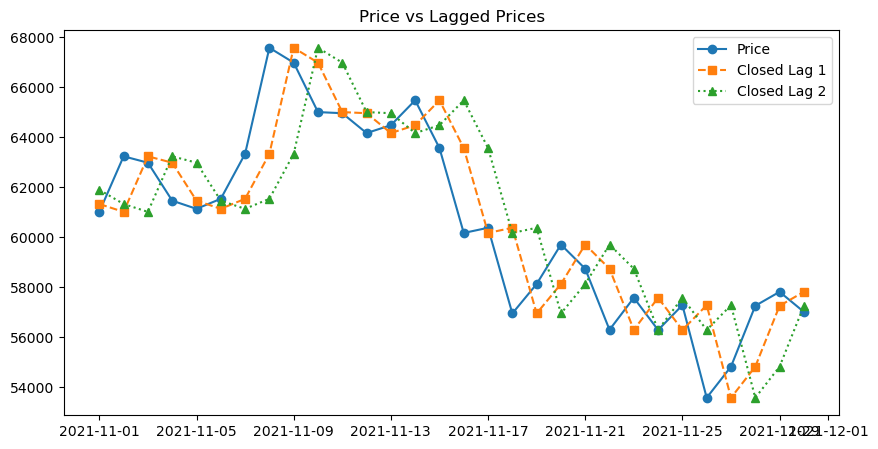

In [25]:
# Filter data for November 2021
df_nov_2021 = df.loc['2021-11']
df_plot = df_nov_2021[['Price', 'closed_lag1', 'closed_lag2']].dropna()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each column with a different linestyle
ax.plot(df_plot.index, df_plot['Price'], label="Price", linestyle='-', marker='o')
ax.plot(df_plot.index, df_plot['closed_lag1'], label="Closed Lag 1", linestyle='--', marker='s')
ax.plot(df_plot.index, df_plot['closed_lag2'], label="Closed Lag 2", linestyle=':', marker='^')

# Add labels and legend
plt.title("Price vs Lagged Prices")
plt.legend()
plt.show()

# Seasonality

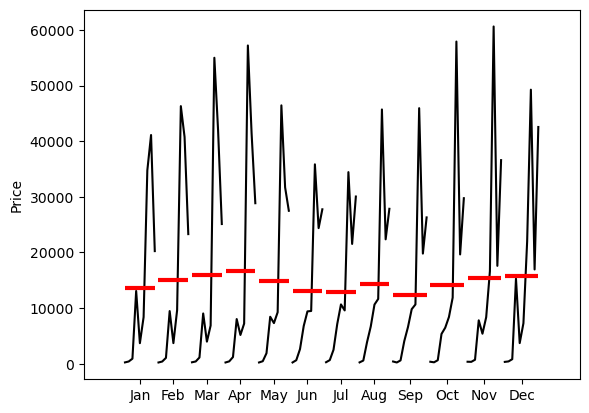

In [26]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of BTC Price
month_plot(df['Price'].resample('ME').mean(),
           ylabel = 'Price')
plt.show()

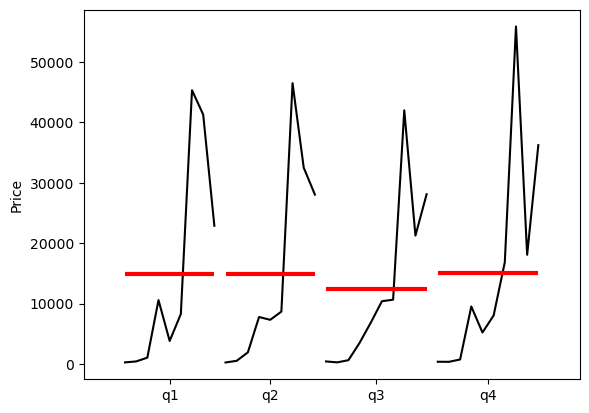

In [27]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of closing values
quarter_plot(df['Price'].resample('QE').mean(),
           ylabel = 'Price')
plt.show()

#### Seasonal decompose - To decompose a time series into its constituent parts to better understand the underlying patterns.

components

- Trend: The overall direction of the series (increasing, decreasing, or stable).
- Seasonal: Repeating patterns at fixed intervals (e.g., daily, weekly, monthly).
- Residual: The remaining variation after removing trend and seasonal components.

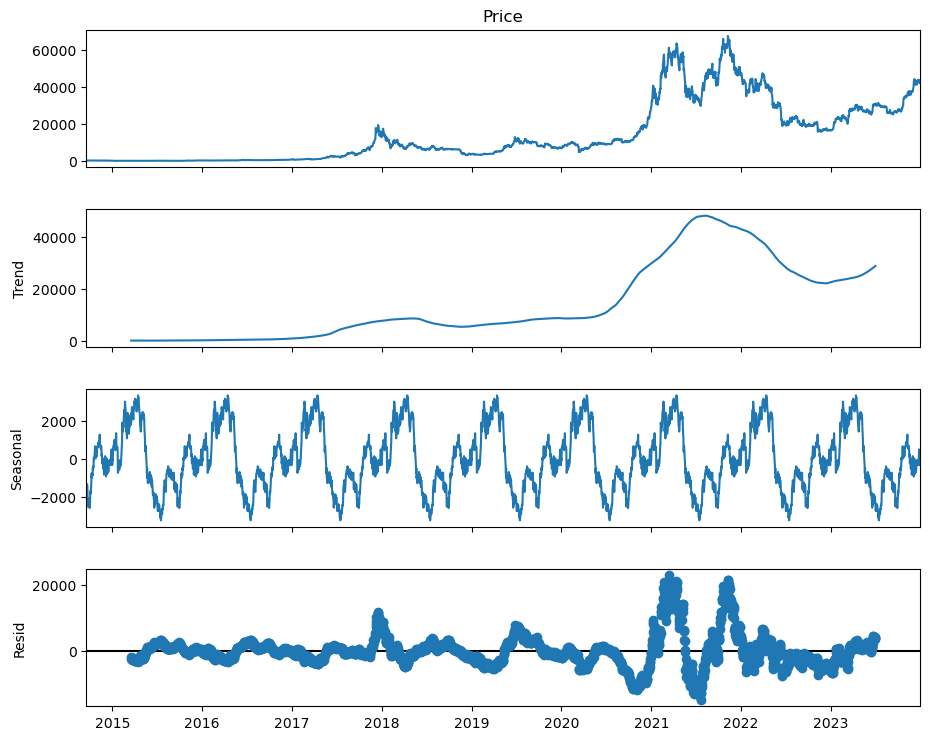

In [40]:
# Seasonal Decomposition Plots for Bitcoin Data
# Multiplicative model type, and daily (365) period
decomposition = seasonal_decompose(df['Price'],
                                   model = 'additive',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

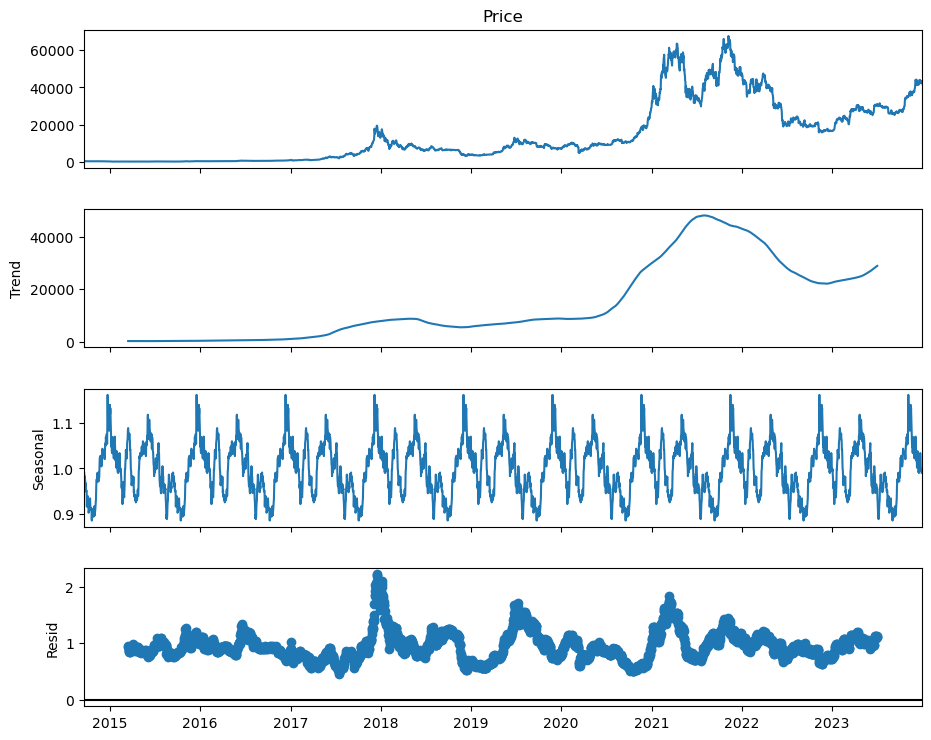

In [43]:
# Seasonal Decomposition Plots for Bitcoin Data
# Multiplicative model type, and daily (365) period
decomposition = seasonal_decompose(df['Price'],
                                   model = 'multiplicative',
                                   period = 360)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

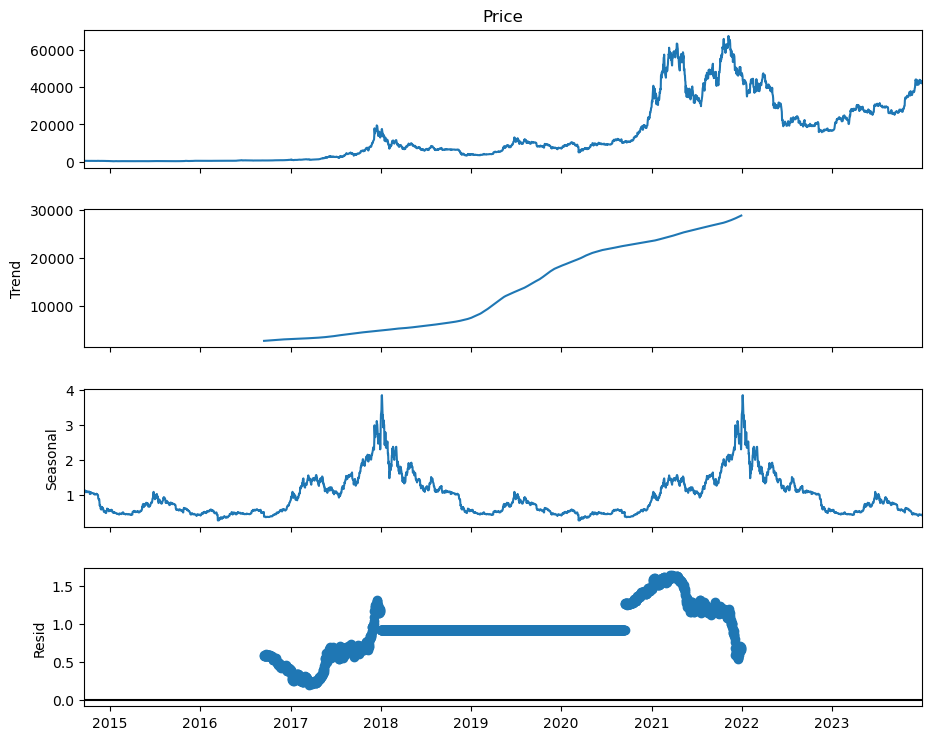

In [38]:
# Seasonal Decomposition Plots for Bitcoin Data
# Multiplicative model type, and daily (365) period
decomposition = seasonal_decompose(df['Price'],
                                   model = 'multiplicative',
                                   period = 1460)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

Seasonality:
* 24 for hourly
* 7 or 365 for daily, but 7 is preferred for modeling
* 52 for weekly
* 12 for monthly
* 4 for quarterly
* 5 for weekdays

# Auto-Correlation

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.

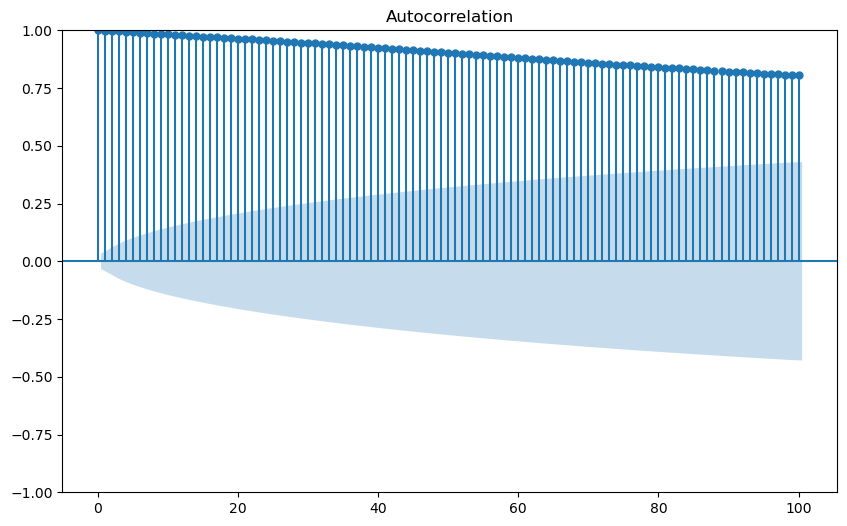

In [41]:
# Plot the autocorrelation (ACF) of the bitcoin closing values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['Price'], lags = 100, ax = ax)
plt.show()

# Partial Auto-correlation

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

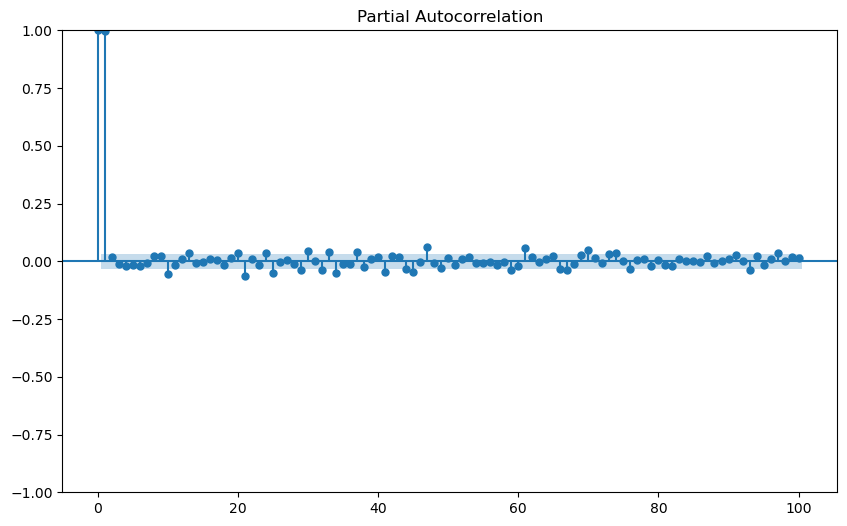

In [42]:
# Plot the partial autocorrelation (PACF) of the bitcoin closing values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['Price'], lags = 100, ax = ax)
plt.show()